In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K1 = 19
K2 = 9
ep = 0.32
est = 1/3
M1 = 0.38
M2 = 0.23

In [3]:
IHR = est*1*(1 + K1*M1*(1-ep) + K2*M2*(1-ep))/(1 + K1*M1 + K2*M2)

In [4]:
IHR

0.23703271784904437

In [5]:
import math
def my_fun(x, x1, x2):
    return 1/(1 + np.exp(-x1*(x-x2)))


In [6]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [7]:
xdata2 = [0, 4, 11, 18, 25]
ydata2 = [0.0001, 0.006, 0.067, 0.225, 0.586]

xdata = [0, 14, 16, 21]
ydata = [0.0001, 0.174, 0.461, 0.752]

In [53]:
popt2, pcov2 = curve_fit(my_fun, xdata3, ydata3, p0 = [0.1, 10], bounds = ([0, 0], [1000, 30]))


In [36]:
popt, pcov = curve_fit(my_fun, xdata, ydata, p0 = [0.1, 10], bounds = ([0, 0], [1000, 30]))


In [37]:
x = np.linspace(0, 60, 60)
y = np.zeros([60, ])
for i in range(60):
    y[i] = my_fun(x[i], popt[0], popt[1])


In [54]:
x3 = np.linspace(0, 60, 60)
y3 = np.zeros([60, ])
for i in range(60):
    y3[i] = my_fun(x2[i], popt2[0], popt2[1])


In [12]:
my_fun(10, popt[0], popt[1])

NameError: name 'popt' is not defined

In [13]:
import pandas as pd

In [14]:
xdata2

[0, 4, 11, 18, 25]

In [15]:
import datetime 

date = datetime.datetime.strptime("01.12.2021", "%d.%m.%Y")
mod= [date + datetime.timedelta(days=0), date + datetime.timedelta(days=4), date + datetime.timedelta(days=11), date + datetime.timedelta(days=18), date + datetime.timedelta(days=25)]
print(datetime.datetime.strftime(modified_date, "%d.%m.%Y"))

NameError: name 'modified_date' is not defined

In [ ]:
np.shape(y2)

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

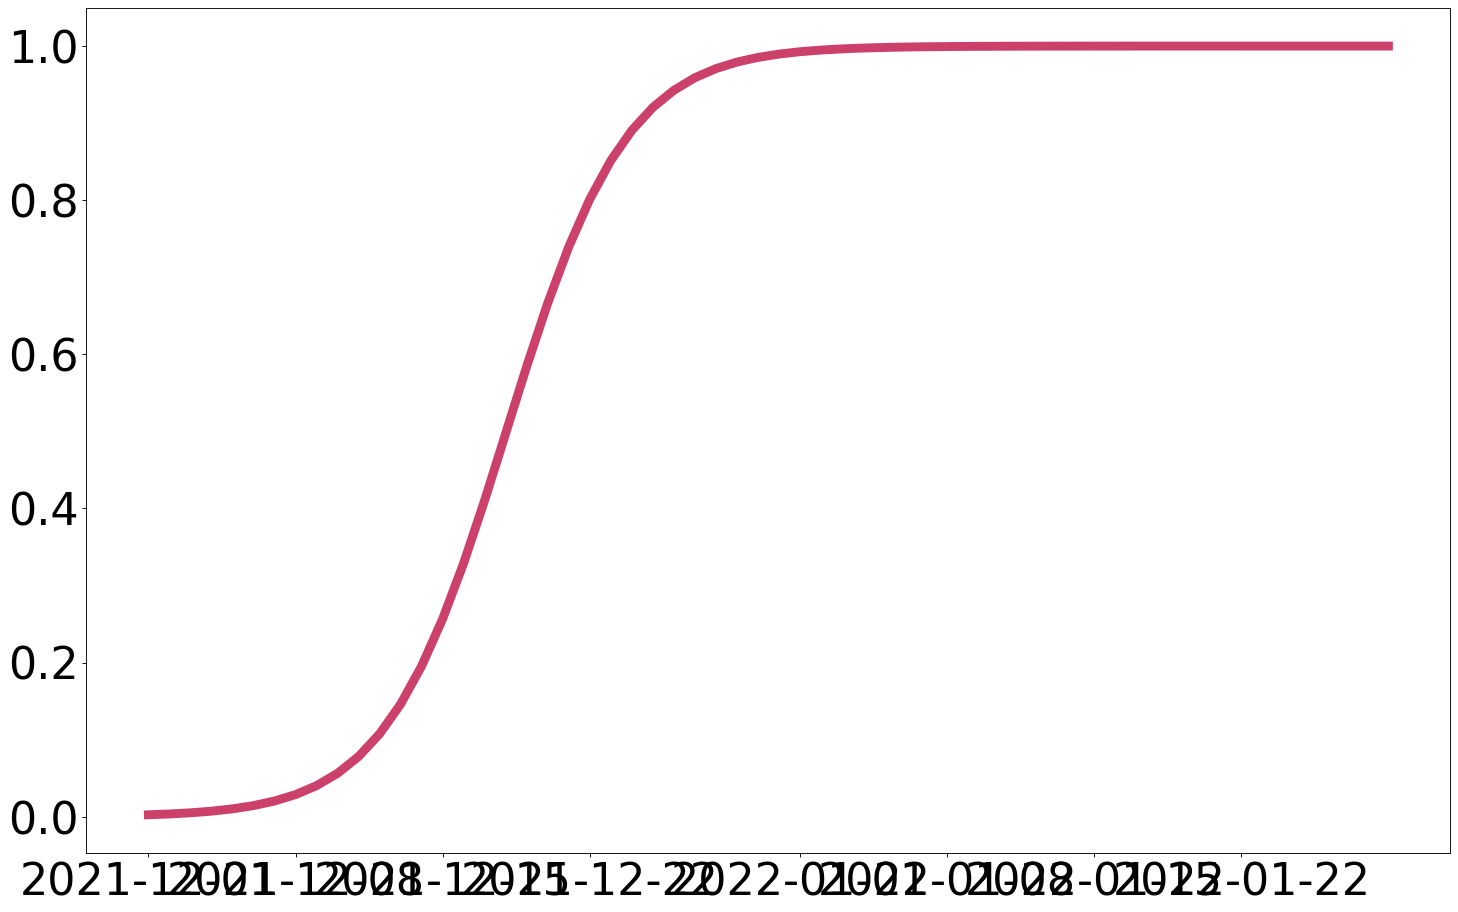

In [39]:
drange1 = pd.date_range("2021-12-01", periods=60, freq="1D")

fig = plt.figure(num=None, figsize=(22, 14), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 40})





#plt.plot(x, y, lw = 8, color='xkcd:dark pink', label = 'Texas')
plt.plot(drange1, y, lw = 8, color='xkcd:dark pink', label = 'USA')

#plt.plot(xdata, ydata, 'k*', markersize=45)
plt.plot(mod, ydata, 'k*', markersize=45)
plt.ylabel('Omicron prevalence', fontsize = 50)

#drange1[::7], 

plt.xticks(drange1[::7], rotation=90)  

plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
y2 = np.savetxt('prev3.txt', y2)

In [19]:
import pandas as pd

us = pd.read_csv('us2.csv', delimiter = ';')


In [88]:
us

,date,cases,deaths,case_diff,death_diff
0,14/08/2021,36686066,621051,0.0,0.0
1,15/08/2021,36729884,621228,43818.0,177.0
2,16/08/2021,36989377,622244,259493.0,1016.0
3,17/08/2021,37133674,623237,144297.0,993.0
4,18/08/2021,37298285,624365,164611.0,1128.0
...,...,...,...,...,...
119,11/12/2021,49845209,795727,51333.0,413.0
120,12/12/2021,49881563,795922,36354.0,195.0
121,13/12/2021,50084406,797214,202843.0,1292.0
122,14/12/2021,50201298,798945,116892.0,1731.0


In [82]:
us['case_diff'] = us['cases'].diff().fillna(0)
us['death_diff'] = us['deaths'].diff().fillna(0)

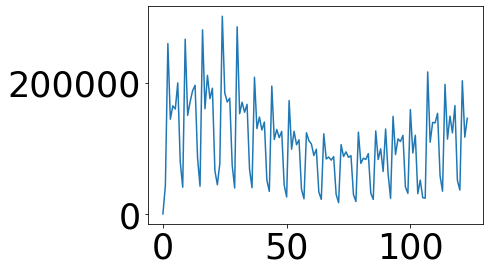

In [136]:
plt.plot(us['case_diff'])
cases = us['case_diff'].to_numpy()
avg = np.zeros([17,])
for i in range(17):
    avg[i] = np.mean(cases[i*7:i*7+7])

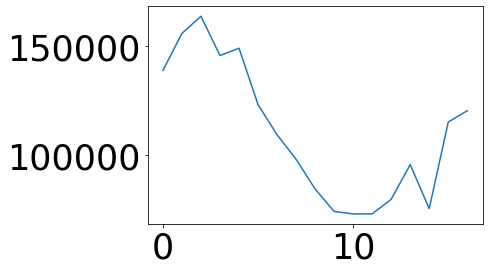

In [137]:
plt.plot(avg)

In [195]:
def omicron(x, x0, x01, x02, x03, x04, x5):
    Nd = 125
    dt = 0.1  #time step
    t = 0  #number of steps
    N = 329.5e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    
    Icc = np.zeros([int(Nd/dt), ])

    R = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])
    gamma2 = 1/4
    
    
    I1[0] = x5
    R[0] = 0.20
    V[0] = 0.65
    S[0] = (1  - I1[0] - R[0] - V[0])
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.0015
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = x04
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt])
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*I1[tt] - gamma2*E1[tt])
        A1[tt+1] = A1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        Icc[tt+1] = Icc[tt] + dt*(0.45*gamma2*E1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt])        
        if(tt % int(1/dt) == 0):
            Ic[count] = Icc[tt]*N
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    avg_Ic = np.zeros([18,])
    for i in range(18):
        avg_Ic[i] = np.mean(Ic[i*7:i*7+7])
    return np.diff(avg_Ic)

In [199]:

xdata = np.linspace(0, 17, 17)
ydata = avg
popt1, pcov = curve_fit(omicron, xdata, ydata, p0 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.005], bounds = ([0.05, 0.05, 0.05, 0.05, 0.05, 0.000001], [5, 5, 5, 5, 5, 0.01]))

In [200]:
Ic = omicron(0, popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5])

popt

array([2.86743247e+00, 2.72985592e+00, 2.51125637e+00, 2.75403998e+00,
       4.73706473e+00, 5.12642927e-04])

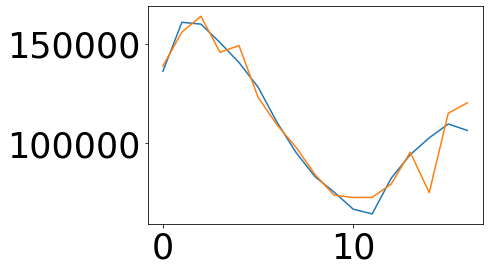

In [198]:
plt.plot(Ic)
plt.plot(avg)

In [216]:
def omicron2(x, tr, esc):
    Nd = 280
    dt = 0.05  #time step
    t = 0  #number of steps
    N = 329.5e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    A2 = np.zeros([int(Nd/dt), ])
    gamma2 = 1/4
    R = np.zeros([int(Nd/dt), ])
    I2 = np.zeros([int(Nd/dt), ])
    E2 = np.zeros([int(Nd/dt), ])
    R2 = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])   
    I2c = np.zeros([Nd, ])
    Eb = np.zeros([Nd, ])

    R2c = np.zeros([Nd, ])  
    
    I1[0] = x5
    R[0] = 0.20
    V[0] = 0.65
    S[0] = (1  - I1[0] - R[0] - V[0])
    bita2 = 0
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.0015
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = x04
            bita2 = x04*(1 + tr)
            
        if (tt*dt == 108):
            I2[tt] = 0.001*I1[tt]
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt] - bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]))
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*(I1[tt] + (2/3)*A1[tt])- gamma2*E1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        A1[tt+1] = I1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt] - esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]))        
        
        E2[tt+1] = E2[tt] + dt*(bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]) - gamma2*E2[tt])
        I2[tt+1] = I2[tt] + dt*(0.25*gamma2*E2[tt] - gamma*I2[tt])
        A2[tt+1] = A2[tt] + dt*(0.75*gamma2*E2[tt] - gamma*A2[tt])

        R2[tt+1] = R2[tt] + dt*(gamma*I2[tt] + gamma*A2[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt] - esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]))        
        if(tt % int(1/dt) == 0):
            Ic[count] = I1[tt]
            I2c[count] = I2[tt]/(I1[tt] + I2[tt])
            Eb[count] = I2[tt]
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    return [I2c[104 + 0], I2c[108 + 4], I2c[108 + 11], I2c[108 + 18]]

In [217]:
def omicron3(x, tr, esc):
    Nd = 280
    dt = 0.05  #time step
    t = 0  #number of steps
    N = 329.5e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    A2 = np.zeros([int(Nd/dt), ])
    gamma2 = 1/4
    R = np.zeros([int(Nd/dt), ])
    I2 = np.zeros([int(Nd/dt), ])
    E2 = np.zeros([int(Nd/dt), ])
    R2 = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])   
    I2c = np.zeros([Nd, ])
    Eb = np.zeros([Nd, ])

    R2c = np.zeros([Nd, ])  
    
    I1[0] = x5
    R[0] = 0.20
    V[0] = 0.65
    S[0] = (1  - I1[0] - R[0] - V[0])
    bita2 = 0
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.0015
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = x04
            bita2 = x04*(1 + tr)
            
        if (tt*dt == 108):
            I2[tt] = 0.001*I1[tt]
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt] - bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]))
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*(I1[tt] + (2/3)*A1[tt])- gamma2*E1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        A1[tt+1] = I1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt] - esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]))        
        
        E2[tt+1] = E2[tt] + dt*(bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]) - gamma2*E2[tt])
        I2[tt+1] = I2[tt] + dt*(0.25*gamma2*E2[tt] - gamma*I2[tt])
        A2[tt+1] = A2[tt] + dt*(0.75*gamma2*E2[tt] - gamma*A2[tt])

        R2[tt+1] = R2[tt] + dt*(gamma*I2[tt] + gamma*A2[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt] - esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]))        
        if(tt % int(1/dt) == 0):
            Ic[count] = I1[tt]
            I2c[count] = I2[tt]/(I1[tt] + I2[tt])
            Eb[count] = I2[tt]
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    return I2c

In [218]:
x0, x01, x02, x03, x04, x5 = popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5]
I2c = omicron2(0, 0.0, 0.85)

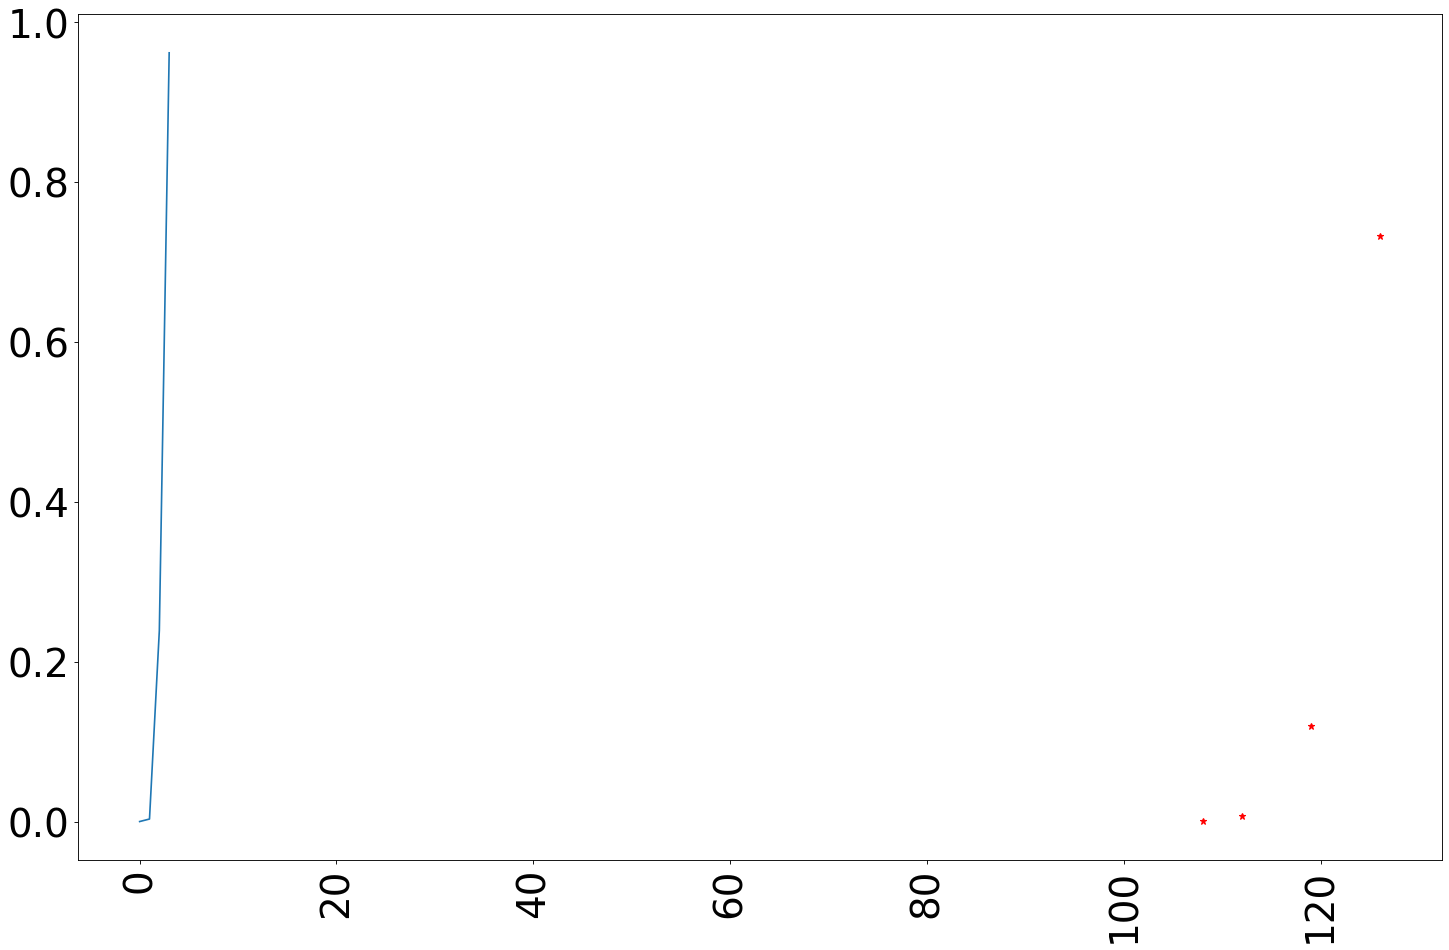

In [219]:
import matplotlib.dates as mdates

drange1 = pd.date_range("2021-08-14", periods=280, freq="1D")
drange2 = pd.date_range("2021-08-14", periods=15, freq="7D")

fig = plt.figure(num=None, figsize=(22, 14), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})


xdata = [108 + 0, 108 + 4, 108 + 11, 108 + 18]
ydata = [0.0001, 0.007, 0.12, 0.732]

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(I2c)
plt.plot(xdata, ydata, 'r*')

In [287]:
xdata = [106, 108 + 13, 108 + 20]
ydata = [0.0017, 0.058, 0.37]
popt, pcov = curve_fit(omicron2, xdata, ydata, p0 = [-0.2, 0.8], bounds = ([-0.201, 0], [-0.2, 2]))


In [288]:
popt

array([-0.2      ,  0.7170562])

In [269]:
I2c = omicron3(0, popt[0], popt[1])

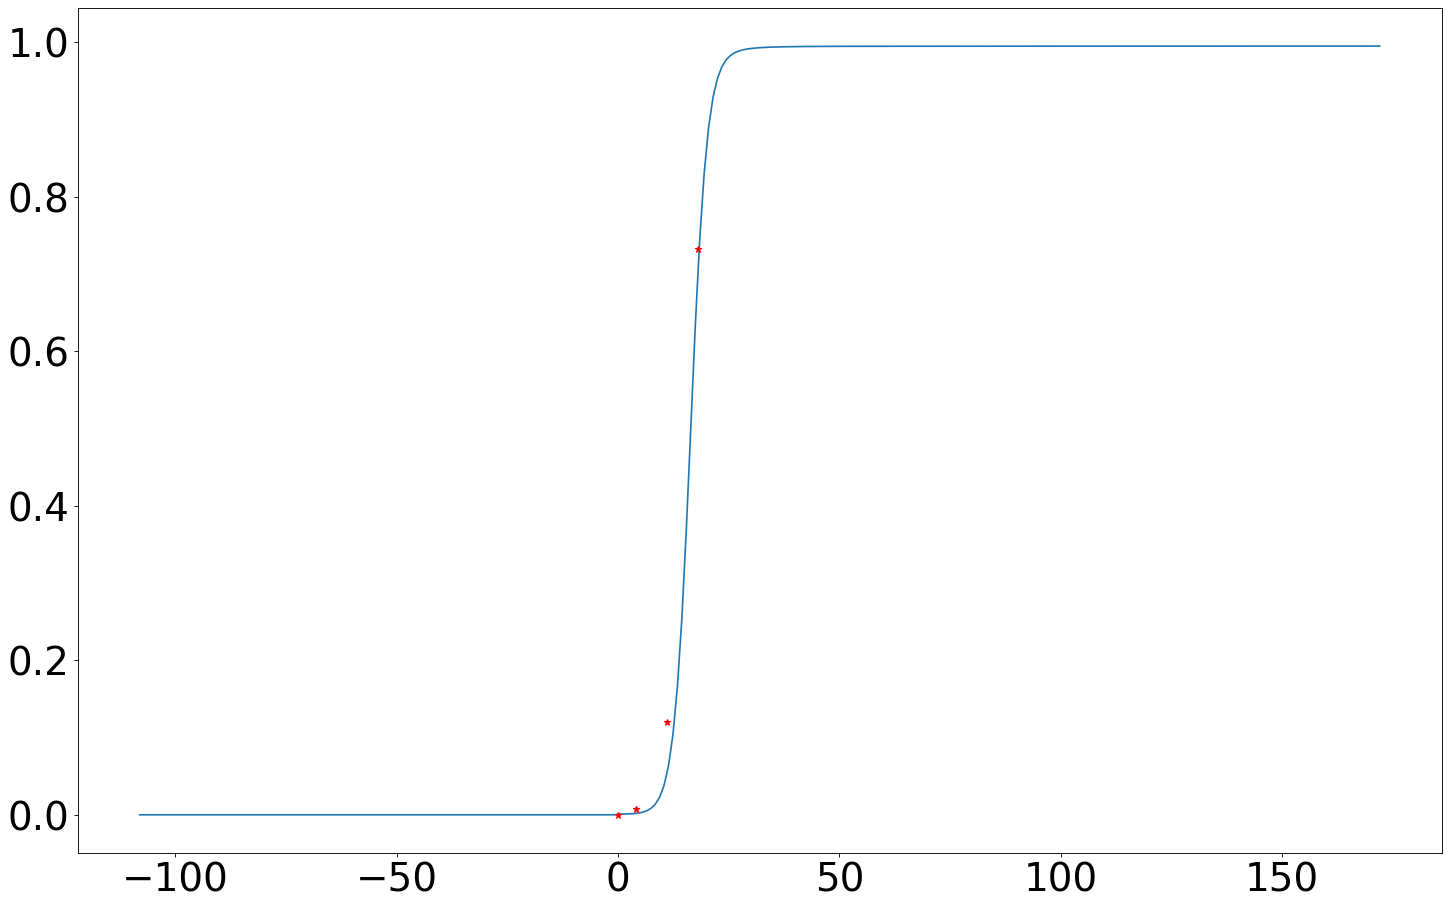

In [270]:

fig = plt.figure(num=None, figsize=(22, 14), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
xxdata = [0, 4, 11, 18]
xx = np.linspace(0, 280, 280)
plt.plot(xx - 108, I2c)
plt.plot(xxdata, ydata, 'r*')


In [221]:
Trr = [0.8, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]

In [222]:
Escc = [0.7170562, 5.65354768e-01, 0.51028615, 0.46435288, 0.4254934, 0.39219186, 0.36333664, 0.33809404, 0.31582652, 0.2960382, 0.27833761, 0.26241159]

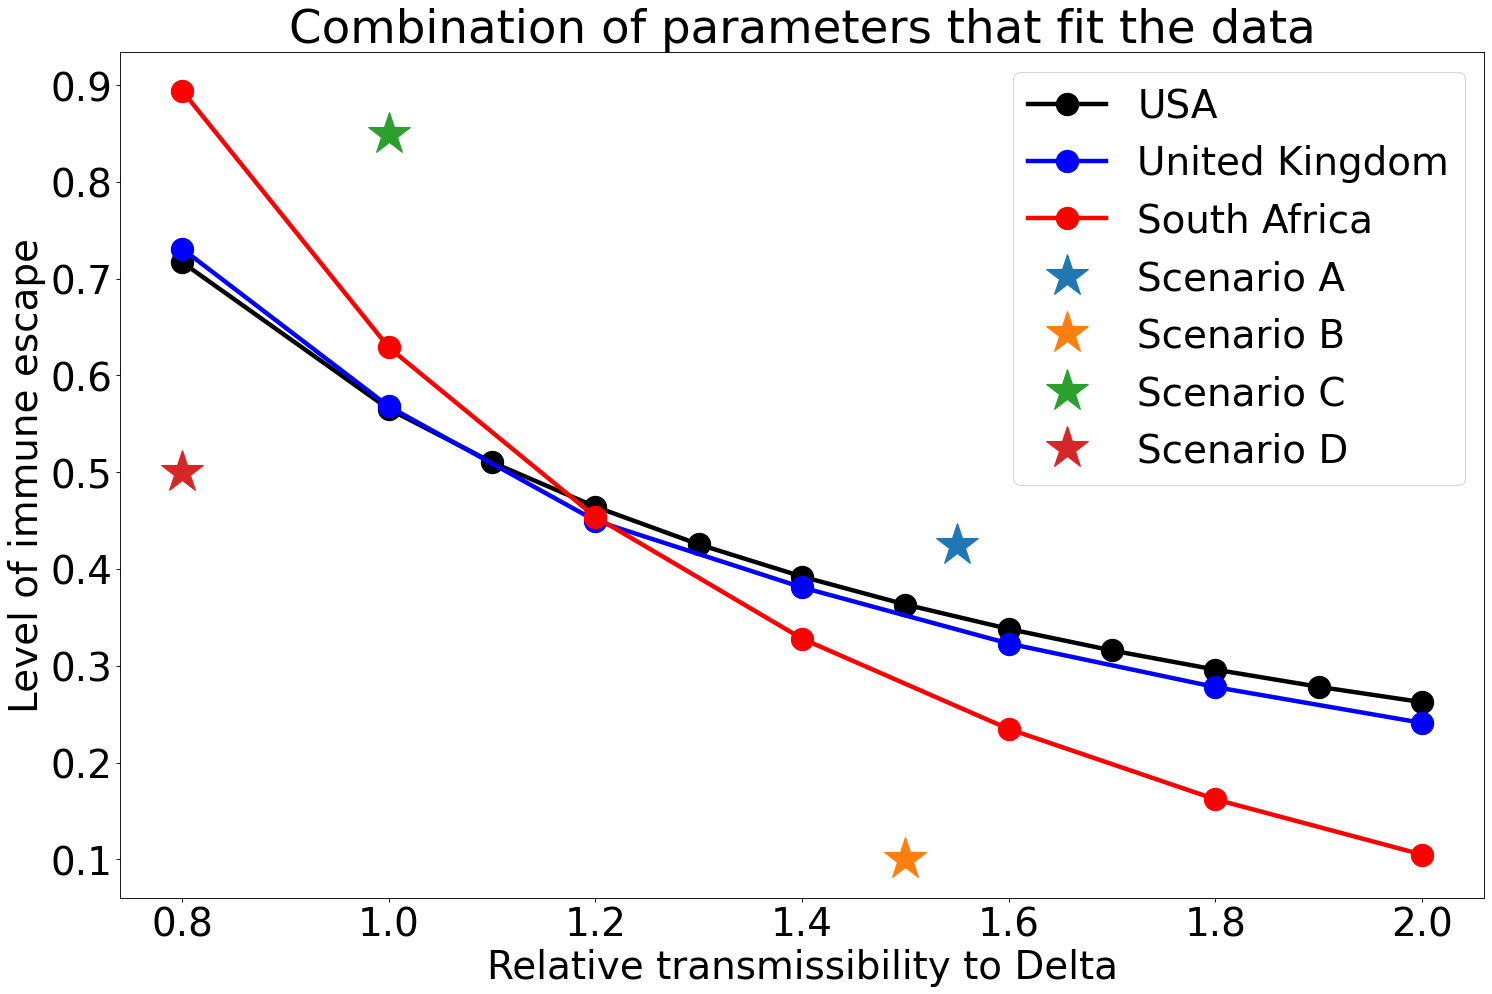

In [315]:
x1 = 1.55
x2 = 1.5
x3 = 1
x4 = 0.8

y1 = 0.425
y2 = 0.1
y3 = 0.85
y4 = 0.5
fig = plt.figure(num=None, figsize=(22, 14), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

plt.plot(Trr, Escc, 'k-o', markersize=20, lw =4, label = 'USA')
plt.plot(Tr_UK, Esc_UK, 'b-o', markersize=20, lw = 4, label = 'United Kingdom')


plt.plot(Tr_sa, Esc_sa, 'r-o', markersize=20, lw = 4, label = 'South Africa')

plt.plot(x1, y1,  '*', markersize=40, label = 'Scenario A')
plt.plot(x2, y2,  '*', markersize=40, label = 'Scenario B')

plt.plot(x3, y3,  '*', markersize=40, label = 'Scenario C')

plt.plot(x4, y4,  '*', markersize=40, label = 'Scenario D')

plt.xlabel('Relative transmissibility to Delta')
plt.ylabel('Level of immune escape')
plt.title('Combination of parameters that fit the data')
plt.legend()

In [ ]:
def omicron4(x, R0, V0):
    Nd = 280
    dt = 0.05  #time step
    t = 0  #number of steps
    N = 329.5e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    A2 = np.zeros([int(Nd/dt), ])
    gamma2 = 1/4
    R = np.zeros([int(Nd/dt), ])
    I2 = np.zeros([int(Nd/dt), ])
    E2 = np.zeros([int(Nd/dt), ])
    R2 = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])   
    I2c = np.zeros([Nd, ])
    Eb = np.zeros([Nd, ])

    R2c = np.zeros([Nd, ])  
    
    I1[0] = x5
    R[0] = R0
    V[0] = 0.65
    S[0] = (1  - I1[0] - R[0] - V[0])
    bita2 = 0
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.0015
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = x04
            bita2 = x04*(1 + tr)
            
        if (tt*dt == 108):
            I2[tt] = 0.001*I1[tt]
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt] - bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]))
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*(I1[tt] + (2/3)*A1[tt])- gamma2*E1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        A1[tt+1] = I1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt] - esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]))        
        
        E2[tt+1] = E2[tt] + dt*(bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]) - gamma2*E2[tt])
        I2[tt+1] = I2[tt] + dt*(0.25*gamma2*E2[tt] - gamma*I2[tt])
        A2[tt+1] = A2[tt] + dt*(0.75*gamma2*E2[tt] - gamma*A2[tt])

        R2[tt+1] = R2[tt] + dt*(gamma*I2[tt] + gamma*A2[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt] - esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]))        
        if(tt % int(1/dt) == 0):
            Ic[count] = I1[tt]
            I2c[count] = I2[tt]/(I1[tt] + I2[tt])
            Eb[count] = I2[tt]
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    k1 = 1     
    k2 = 1
    for i in range(280):
        
    return I2c

In [298]:
omi = pd.read_csv('covid-variants.csv')

In [299]:
omi

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
96043,Zimbabwe,2021-11-01,Omicron,0,0.0,6
96044,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
96045,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
96046,Zimbabwe,2021-11-01,others,0,0.0,6


In [20]:
case_uk = pd.read_csv('UK_cases.txt')
case_sa = pd.read_csv('SA_case.txt')

In [21]:
np.shape(case_uk)

(79, 1)

In [22]:

cases_uk = case_uk.to_numpy()
cases_sa = case_sa.to_numpy()

avg_uk = np.zeros([11,])
avg_sa = np.zeros([11,])

for i in range(11):
    avg_uk[i] = np.mean(cases_uk[i*7:i*7+7])
    avg_sa[i] = np.mean(cases_sa[i*7:i*7+7])

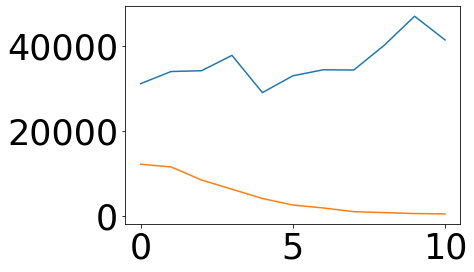

In [23]:
plt.plot(avg_uk)
plt.plot(avg_sa)

In [24]:
np.shape(avg_uk)

(11,)

In [25]:
date_row = pd.read_excel('date_row3.xlsx')
date_series = date_row['date'].squeeze()
date_series_str = date_series.dt.strftime('%Y/%m/%d')

In [26]:
get_info2('2021-11-01', 'Zimbabwe', omi, 'perc_sequences')

NameError: name 'get_info2' is not defined

In [288]:
def omicron(x, x0, x01, x02, x03, x04, x5):
    Nd = 97
    dt = 0.1  #time step
    t = 0  #number of steps
    N = 59.31e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    
    Icc = np.zeros([int(Nd/dt), ])

    R = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])
    gamma2 = 1/4
    
    
    I1[0] = x5
    R[0] = 0.40
    V[0] = 0.122
    S[0] = (1  - I1[0] - R[0] - V[0])
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.005
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = 4*(x04)
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt])
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*I1[tt] - gamma2*E1[tt])
        A1[tt+1] = A1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        Icc[tt+1] = Icc[tt] + dt*(0.45*gamma2*E1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt])        
        if(tt % int(1/dt) == 0):
            Ic[count] = Icc[tt]*N
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    avg_Ic = np.zeros([12,])
    for i in range(12):
        avg_Ic[i] = np.mean(Ic[i*7:i*7+7])
    return np.diff(avg_Ic)

In [289]:

xdata = np.linspace(0, 11, 11)
ydata = avg_sa
popt2, pcov = curve_fit(omicron, xdata, ydata, p0 = [0.1, 0.1, 0.1, 5, 5, 0.005], bounds = ([0.05, 0.05, 0.05, 1, 1, 0.000001], [100, 100, 100, 100, 100, 0.01]))

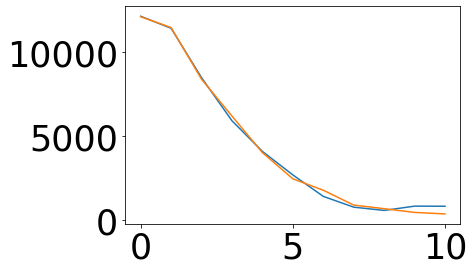

In [290]:
Ic = omicron(0, popt2[0], popt2[1], popt2[2], popt2[3], popt2[3], popt2[5])
plt.plot(Ic)
plt.plot(avg_sa)

In [249]:
popt2

array([4.94926150e-01, 4.88836605e-01, 3.96067944e-01, 1.00000000e+00,
       5.46713413e+00, 5.21427379e-04])

In [291]:
def omicron2(x, esc):
    Nd = 280
    dt = 0.05  #time step
    t = 0  #number of steps
    N = 59.31e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    A2 = np.zeros([int(Nd/dt), ])
    gamma2 = 1/4
    R = np.zeros([int(Nd/dt), ])
    I2 = np.zeros([int(Nd/dt), ])
    E2 = np.zeros([int(Nd/dt), ])
    R2 = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])   
    I2c = np.zeros([Nd, ])
    Eb = np.zeros([Nd, ])

    R2c = np.zeros([Nd, ])  
    
    I1[0] = x5
    R[0] = 0.40
    V[0] = 0.122
    S[0] = (1  - I1[0] - R[0] - V[0])
    bita2 = 0
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.005
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = 4*(x04)
            bita2 = 4*((x04))*(1 + tr)
            
        if (tt*dt == 78):
            I2[tt] = 0.0049*I1[tt]
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt] - bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]))
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*(I1[tt] + (2/3)*A1[tt])- gamma2*E1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        A1[tt+1] = I1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt] - esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]))        
        
        E2[tt+1] = E2[tt] + dt*(bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]) - gamma2*E2[tt])
        I2[tt+1] = I2[tt] + dt*(0.25*gamma2*E2[tt] - gamma*I2[tt])
        A2[tt+1] = A2[tt] + dt*(0.75*gamma2*E2[tt] - gamma*A2[tt])

        R2[tt+1] = R2[tt] + dt*(gamma*I2[tt] + gamma*A2[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt] - esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]))        
        if(tt % int(1/dt) == 0):
            Ic[count] = I1[tt]
            I2c[count] = I2[tt]/(I1[tt] + I2[tt])
            Eb[count] = I2[tt]
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    return [I2c[78], I2c[78 + 15], I2c[108 + 29], I2c[108 + 13]]

In [16]:
x0, x01, x02, x03, x04, x5 = popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]
xdata = [78, 78 + 15, 78 + 29, 108 + 13]
ydata = [0.0049, 0.211, 0.8546, 0.9577]
tr = 1
popt, pcov = curve_fit(omicron2, xdata, ydata, p0 = [0.8], bounds = ([0], [2]))

IndexError: index 2 is out of bounds for axis 0 with size 2

In [17]:
popt

NameError: name 'popt' is not defined

In [18]:
Tr_UK = [0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Esc_UK = [0.731, 0.568, 0.45, 0.381,  0.323, 0.278, 0.241]

In [19]:
Tr_sa = [0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Esc_sa = [0.8944, 0.629,  0.4539, 0.328, 0.2347, 0.162, 0.1049]

In [20]:
def omicron3(x, tr, esc):
    Nd = 280
    dt = 0.05  #time step
    t = 0  #number of steps
    N = 67.22e6
    bita = x0
    S = np.zeros([int(Nd/dt), ])
    I1 = np.zeros([int(Nd/dt), ])
    E1 = np.zeros([int(Nd/dt), ])
    A1 = np.zeros([int(Nd/dt), ])
    A2 = np.zeros([int(Nd/dt), ])
    gamma2 = 1/4
    R = np.zeros([int(Nd/dt), ])
    I2 = np.zeros([int(Nd/dt), ])
    E2 = np.zeros([int(Nd/dt), ])
    R2 = np.zeros([int(Nd/dt), ])
    V = np.zeros([int(Nd/dt), ])
    Ic = np.zeros([Nd, ])
    Sc = np.zeros([Nd, ])
    Rc = np.zeros([Nd, ])
    Vc = np.zeros([Nd, ])   
    I2c = np.zeros([Nd, ])
    Eb = np.zeros([Nd, ])

    R2c = np.zeros([Nd, ])  
    
    I1[0] = x5
    R[0] = 0.1
    V[0] = 0.61
    S[0] = (1  - I1[0] - R[0] - V[0])
    bita2 = 0
    Ic[0] = I1[0]
    Rc[0] = R[0]
    Vc[0] = V[0]
    Sc[0] = S[0]
    vacc = 0.0015
    gamma = 1/10
    count = 0
    for tt in range(int(Nd/dt)-1):    
        if (tt*dt >= 21 and tt*dt < 42):
            bita = x01
            
        if (tt*dt >= 42 and tt*dt < 63):
            bita = x02
            
        if (tt*dt >= 63 and tt*dt < 84):
            bita = x03
            
        if (tt*dt >= 84):
            bita = x04
            bita2 = x04*(1 + tr)
            
        if (tt*dt == 78):
            I2[tt] = 0.004*I1[tt]
            
        S[tt+1] = S[tt] + dt*(-bita*S[tt]*(I1[tt] + (2/3)*A1[tt]) - vacc*S[tt] - bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]))
        E1[tt+1] = E1[tt] + dt*(bita*S[tt]*(I1[tt] + (2/3)*A1[tt])- gamma2*E1[tt])
        I1[tt+1] = I1[tt] + dt*(0.25*gamma2*E1[tt] - gamma*I1[tt])
        A1[tt+1] = I1[tt] + dt*(0.75*gamma2*E1[tt] - gamma*A1[tt])
        R[tt+1] = R[tt] + dt*(gamma*I1[tt] + gamma*A1[tt] - esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]))        
        
        E2[tt+1] = E2[tt] + dt*(bita2*S[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*R[tt]*(I2[tt] + (2/3)*A2[tt]) + esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]) - gamma2*E2[tt])
        I2[tt+1] = I2[tt] + dt*(0.25*gamma2*E2[tt] - gamma*I2[tt])
        A2[tt+1] = A2[tt] + dt*(0.75*gamma2*E2[tt] - gamma*A2[tt])

        R2[tt+1] = R2[tt] + dt*(gamma*I2[tt] + gamma*A2[tt])
        V[tt+1] = V[tt] + dt*(vacc*S[tt] - esc*bita2*V[tt]*(I2[tt] + (2/3)*A2[tt]))        
        if(tt % int(1/dt) == 0):
            Ic[count] = I1[tt]
            I2c[count] = I2[tt]/(I1[tt] + I2[tt])
            Eb[count] = I2[tt]
            Sc[count] = S[tt]
            Rc[count] = R[tt]
            Vc[count] = V[tt]
            
            count = count +1
    return I2c

In [21]:
I2c = omicron3(0, 1, popt[0])

NameError: name 'popt' is not defined

In [22]:
plt.plot(I2c)
plt.plot(xdata, ydata)

NameError: name 'I2c' is not defined

In [134]:
xdata2 = [0, 26-12, 37-12, 61-12]
ydata2 = [0.022, 0.072, 0.431, 0.79]



In [135]:
popt2, pcov2 = curve_fit(my_fun, xdata2, ydata2, p0 = [0.1, 10], bounds = ([0, 0], [1000, 30]))


In [136]:
import pandas as pd

In [139]:
x2 = np.linspace(0, 90, 90)
y2 = np.zeros([90, ])
for i in range(90):
    y2[i] = my_fun(x2[i], popt2[0], popt2[1])

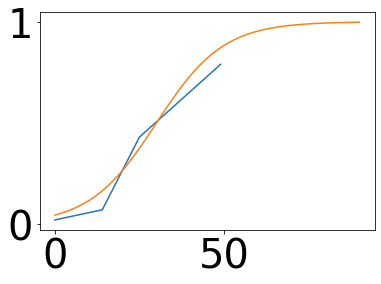

In [140]:
plt.plot(xdata2, ydata2)
plt.plot(x2, y2)

In [141]:
import datetime 

date = datetime.datetime.strptime("12.02.2022", "%d.%m.%Y")
mod= [date + datetime.timedelta(days=0), date + datetime.timedelta(days=26-12), date + datetime.timedelta(days=37-12), date + datetime.timedelta(days=61-12)]
#print(datetime.datetime.strftime(modified_date, "%d.%m.%Y"))

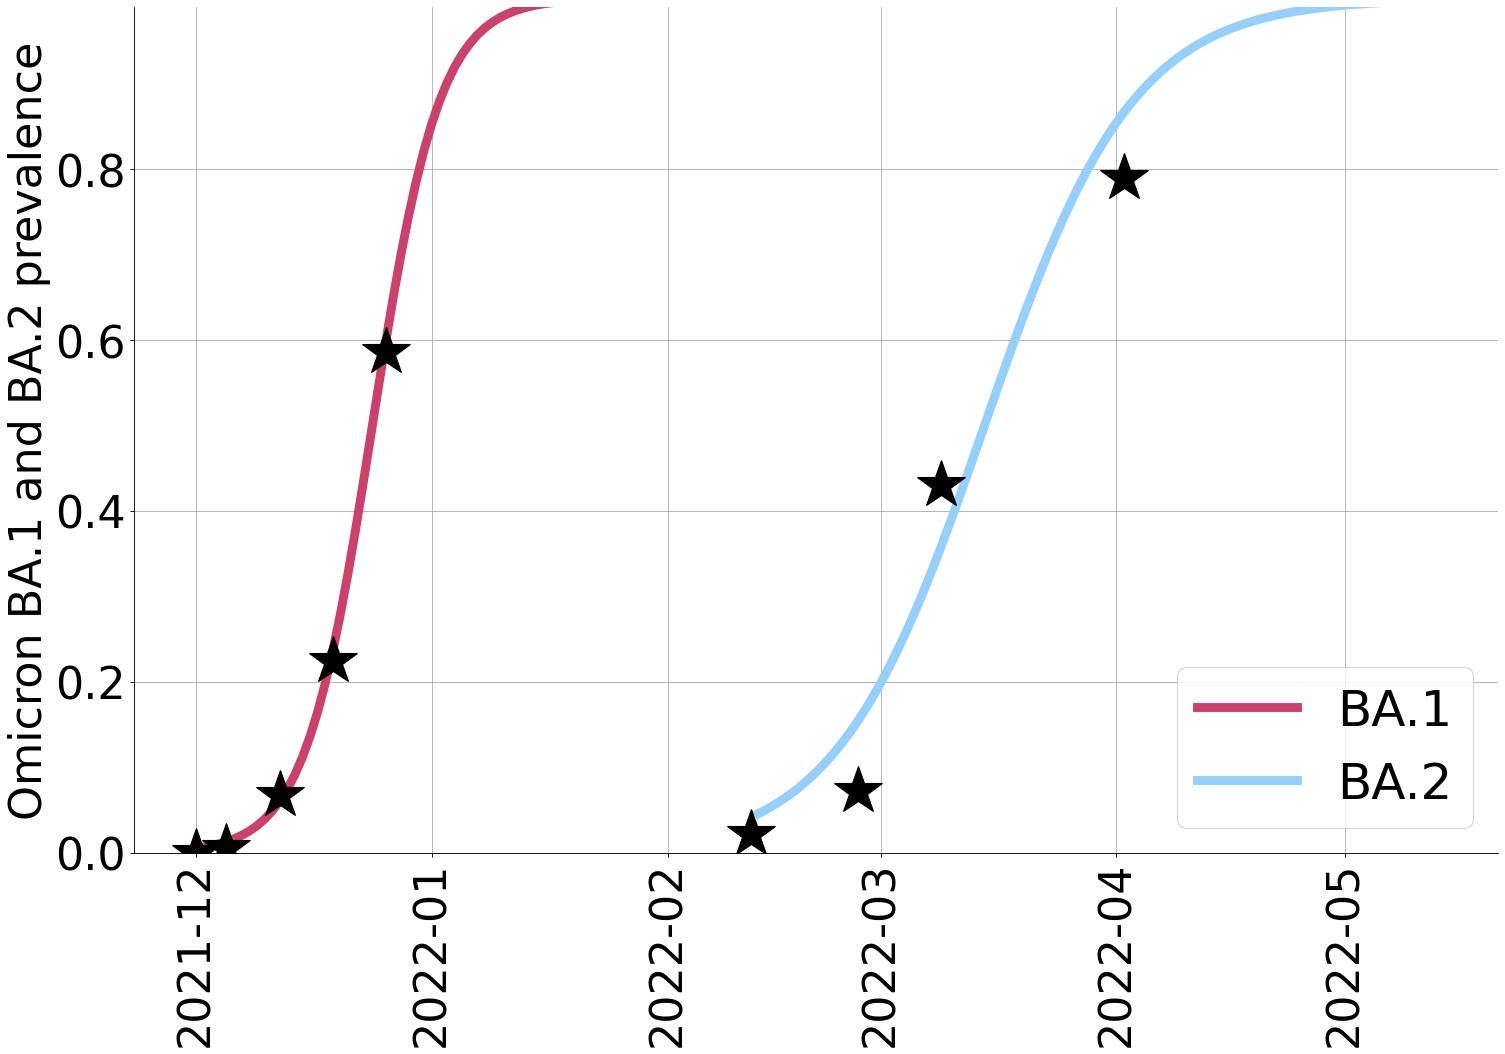

In [146]:
drange1 = pd.date_range("2022-02-13", periods=90, freq="1D")
drange2 = pd.date_range("2021-12-01", periods=60, freq="1D")
drange3 = pd.date_range("2021-12-01", periods=180, freq="1D")

fig = plt.figure(num=None, figsize=(22, 14), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 40})





#plt.plot(x, y, lw = 8, color='xkcd:dark pink', label = 'Texas')

plt.plot(drange2, y3, lw = 8, color='xkcd:dark pink', label = 'BA.1')

plt.plot(drange1, y2, lw = 8, color='xkcd:light blue', label = 'BA.2')




#plt.plot(xdata, ydata, 'k*', markersize=45)
plt.plot(mod, ydata2, 'k*', markersize=45)
plt.plot(mod2, ydata3, 'k*', markersize=45)

plt.ylabel('Omicron BA.1 and BA.2 prevalence', fontsize = 40)
plt.legend(fontsize = 45)
#drange1[::7], 

plt.xticks( rotation=90)  
plt.ylim([0, 0.99])

plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [87]:
y2 = np.savetxt('prevBA2.txt', y2)

In [108]:
xdata3 = [0, 4, 11, 18, 25]
ydata3 = [0.0001, 0.006, 0.067, 0.225, 0.586]

In [109]:
import datetime 

date = datetime.datetime.strptime("01.12.2021", "%d.%m.%Y")
mod2= [date + datetime.timedelta(days=0), date + datetime.timedelta(days=4), date + datetime.timedelta(days=11), date + datetime.timedelta(days=18), date + datetime.timedelta(days=25)]
